In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
DATA_DIR = r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data"

In [14]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [15]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

class_names = train_ds.class_names
len(class_names)


Found 6694 files belonging to 12 classes.
Using 5356 files for training.
Found 6694 files belonging to 12 classes.
Using 1338 files for validation.


12

In [16]:
model = keras.Sequential([
    layers.Rescaling(1/255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 113s 645ms/step - accuracy: 0.4927 - loss: 1.8626 - val_accuracy: 0.5097 - val_loss: 1.7323
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 88s 518ms/step - accuracy: 0.4957 - loss: 1.7142 - val_accuracy: 0.5075 - val_loss: 1.6676
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 88s 521ms/step - accuracy: 0.4955 - loss: 1.6300 - val_accuracy: 0.4918 - val_loss: 1.6663
Epoch 4/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 87s 515ms/step - accuracy: 0.4937 - loss: 1.5648 - val_accuracy: 0.4731 - val_loss: 1.6748
Epoch 5/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 82s 485ms/step - accuracy: 0.4920 - loss: 1.4516 - val_accuracy: 0.4417 - val_loss: 1.8096


In [18]:
calorie_table = {
    "Apple": 52,
    "Banana": 89,
    "Orange": 47,
    "Peach": 39,
    "Grape": 69
}

In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def predict_food(img_path):   # <-- correct parameter
    # Load image safely
    try:
        img = image.load_img(img_path, target_size=IMG_SIZE)
    except:
        print("❌ ERROR: Image path is incorrect or file does not exist!")
        print("Path tried:", img_path)
        return

    # Convert to array
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    index = np.argmax(preds)
    label = class_names[index]

    # Calories
    cal = calorie_table.get(label, "Unknown")

    print("Food Prediction:", label)
    print("Estimated Calories:", cal)

    # Show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"{label} - {cal} kcal")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Food Prediction: work_dir
Estimated Calories: Unknown


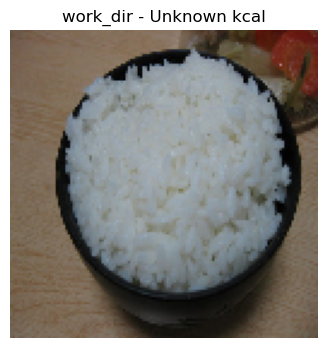

In [24]:
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\rice\0.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Food Prediction: work_dir
Estimated Calories: Unknown


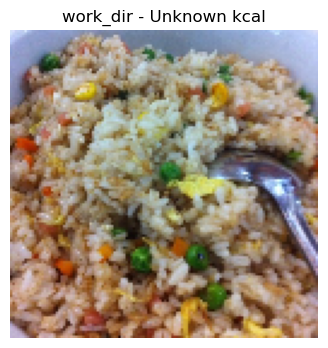

In [25]:
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\rice\5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Food Prediction: work_dir
Estimated Calories: Unknown


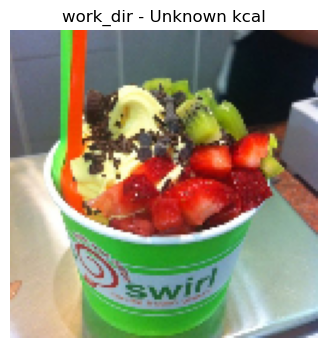

In [26]:
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Dessert\2.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Bread\6.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Dairy product\16.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Egg\2.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Fried food\5.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Meat\1.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Noodles-Pasta\32.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Rice\17.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Seafood\5.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Soup\0.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Vegetable-Fruit\2.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Dessert\2.jpg")
predict_food(r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_05\data\Dessert\2.jpg")









